# 0. GAN reconstruction of chessboard images

Let us **dive deep into Generative Adversarial Networks (GANs)** and explore why they are particularly well-suited for **image reconstruction tasks**.

---

### **💡 What Are GANs?**
Generative Adversarial Networks (**GANs**) are a type of **deep learning model** introduced by Ian Goodfellow in 2014. They consist of **two neural networks**—a **Generator** and a **Discriminator**—that compete in a **game-like structure**, leading to highly realistic image generation.

---

### **⚙️ How Do GANs Work?**
GANs operate through **adversarial training**, where two models work against each other:

#### **1️⃣ Generator (Creator)**
- Takes random noise as input and **creates a fake image** (e.g., a chessboard reconstruction).  
- Continuously improves based on feedback from the discriminator.  

#### **2️⃣ Discriminator (Judge)**
- Evaluates whether an image is **real (from the dataset) or fake (from the generator)**.  
- Guides the generator to **produce increasingly realistic images**.  

💡 **Learning Process:**  
- The **Generator** tries to **fool** the Discriminator by improving its output.  
- The **Discriminator** gets better at **detecting fakes**.  
- Through repeated cycles, the **Generator eventually produces realistic images**.

---

### **🎯 Why Are GANs Great for Image Reconstruction?**
GANs **excel at recovering missing or obscured sections of images** because:

✔ **Generative Ability** → GANs **don’t just copy pixels**—they **learn patterns and textures**, making reconstructions **contextually accurate**.  
✔ **Adversarial Training** → The **competition** between Generator and Discriminator **refines details**, improving realism.  
✔ **Handling Partial Occlusion** → GANs are particularly good at **filling in gaps**, learning from surrounding features to **predict missing parts**.  
✔ **Better Than Traditional Methods** → Unlike OpenCV-based approaches that rely on edge detection, GANs **learn structural relationships**, making **reconstructions smoother and more natural**.  

---

### **🔥 Practical Use Cases**
💡 GANs are widely used in:
- **Face Restoration** → Reconstructing damaged facial images.  
- **Super-Resolution** → Enhancing low-quality images.  
- **Chessboard Image Completion** → As you're doing, GANs can **predict and restore missing chessboard squares**, outperforming classical methods!

# 1. LLM reconstruction of Images via OpenCV

A Large Language Model (LLM) could be incorporated into a Python function to reconstruct the missing or obscured parts of the checkerboard pattern in our image. However, LLMs are primarily optimized for text-based reasoning, so a combination of computer vision techniques and machine learning models (possibly with LLM assistance for logical inference) would be more effective.

🛠 Steps to Reconstruct Secluded Parts of the Checkerboard  

1️⃣ Image Processing with OpenCV

Convert the image to grayscale for better contrast.

Apply edge detection (like cv2.Canny()) to detect the checkerboard grid.

Use cv2.findChessboardCorners() to identify known squares.

2️⃣ Pattern Inference Using an LLM

Use an LLM to reason about missing squares based on detected grid patterns.

Provide structured input (e.g., locations of visible squares) for prediction.

Generate a set of logical rules to reconstruct the obscured parts.

3️⃣ Machine Learning for Image Completion

Train a model (like CNNs or GANs) to predict missing regions based on known checkerboard features.

Use techniques like inpainting (cv2.inpaint()) to fill gaps.

4️⃣ Validation and Refinement

Compare the reconstructed checkerboard with known patterns.

Adjust positions using affine transformations.

📌 How Can a LLM Help?  

💡 It could refine logical consistency, ensuring that reconstructed squares follow the expected pattern even when noise or distortion is present.  
💡 It could assist in mathematical reasoning, predicting checkerboard coordinates where detection failed.

This is a well-commented Python function that uses OpenCV to detect and reconstruct secluded parts of a chessboard in an image. This function leverages image processing techniques like edge detection, corner detection, and inpainting to infer missing or obscured squares.

In [3]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a4/7d/f1c30a92854540bf789e9cd5dde7ef49bbe63f855b85a2e6b3db8135c591/opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/39.5 MB 3.3 MB/s eta 0:00:12
    --------------------------------------- 0.7/39.5 MB 8.8 MB/s eta 0:00:05
   - -------------------------------------- 1.3/39.5 MB 10.6 MB/s eta 0:00:04
   -- ------------------------------------- 2.0/39.5 MB 11.4 MB/s eta 0:00:04
   -- ------------------------------------- 2.6/39.5 MB 11.8 MB/s eta 0:00:04
   --- ------------------------------------ 3.2/39.5 MB 12.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.8/39.5 MB 12.2 MB/s eta 0:00:03
   ---- ----------------------------------- 4.4/39.5 MB 12.3 MB/s eta 0:00:03
   ----- ---------------------------------- 5.0/39.5 MB 12.4 MB/s eta 0:00:03
   -----

In [30]:
import cv2
import numpy as np

def reconstruct_chessboard(image_path):
    """
    Reconstructs missing or obscured parts of a chessboard image.
    
    Args:
        image_path (str): Path to the input chessboard image.
    
    Returns:
        reconstructed_image (numpy.ndarray): Image with reconstructed chessboard.
    """
    # Load the image in grayscale directly ✅
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Ensure the image was loaded correctly
    if image is None:
        raise ValueError("Error: Image could not be loaded. Check the path.")

    # Apply histogram equalization to improve contrast ✅
    image = cv2.equalizeHist(image)

    # Apply Gaussian blur to reduce noise ✅
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply adaptive thresholding to improve chessboard detection ✅
    adaptive_thresh = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # Detect chessboard corners ✅
    pattern_size = (7, 7)  # Adjusted for inner corners of a 15×18 chessboard
    ret, corners = cv2.findChessboardCorners(adaptive_thresh, pattern_size)

    # Debugging output
    print(f"Corners detected: {ret}, Number of corners: {len(corners) if ret else 'None'}")

    if not ret:
        raise ValueError("Chessboard corners could not be detected. Ensure the image is clear.")

    # Convert corners to integer coordinates
    corners = np.int32(corners)

    # Create a mask for inpainting
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [corners], -1, (255), thickness=cv2.FILLED)

    # Inpaint missing parts using Telea algorithm
    reconstructed_image = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

    # Display results
    cv2.imshow("Original Image", image)
    cv2.imshow("Reconstructed Chessboard", reconstructed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return reconstructed_image

# Example usage
image_path = "pos50.png"  # Replace with an appropriate chessboard image path
reconstructed = reconstruct_chessboard(image_path)

Corners detected: True, Number of corners: 49


Explanation of the Function  

✅ Loads the chessboard image for processing.  
✅ Applies Gaussian blur to reduce noise.  
✅ Uses Canny edge detection to detect the chessboard grid.  
✅ Detects chessboard corners using cv2.findChessboardCorners().  
✅ Creates a mask for missing parts of the board.  
✅ Uses image inpainting (cv2.inpaint()) to reconstruct obscured areas.  
✅ Displays the results with OpenCV's imshow().

📌 Limitations: This approach works best for partially obscured chessboards. If large portions are missing, advanced techniques like GAN-based image completion might be needed.

Unfortunately, even regular unobscured images appears mis-shaped:

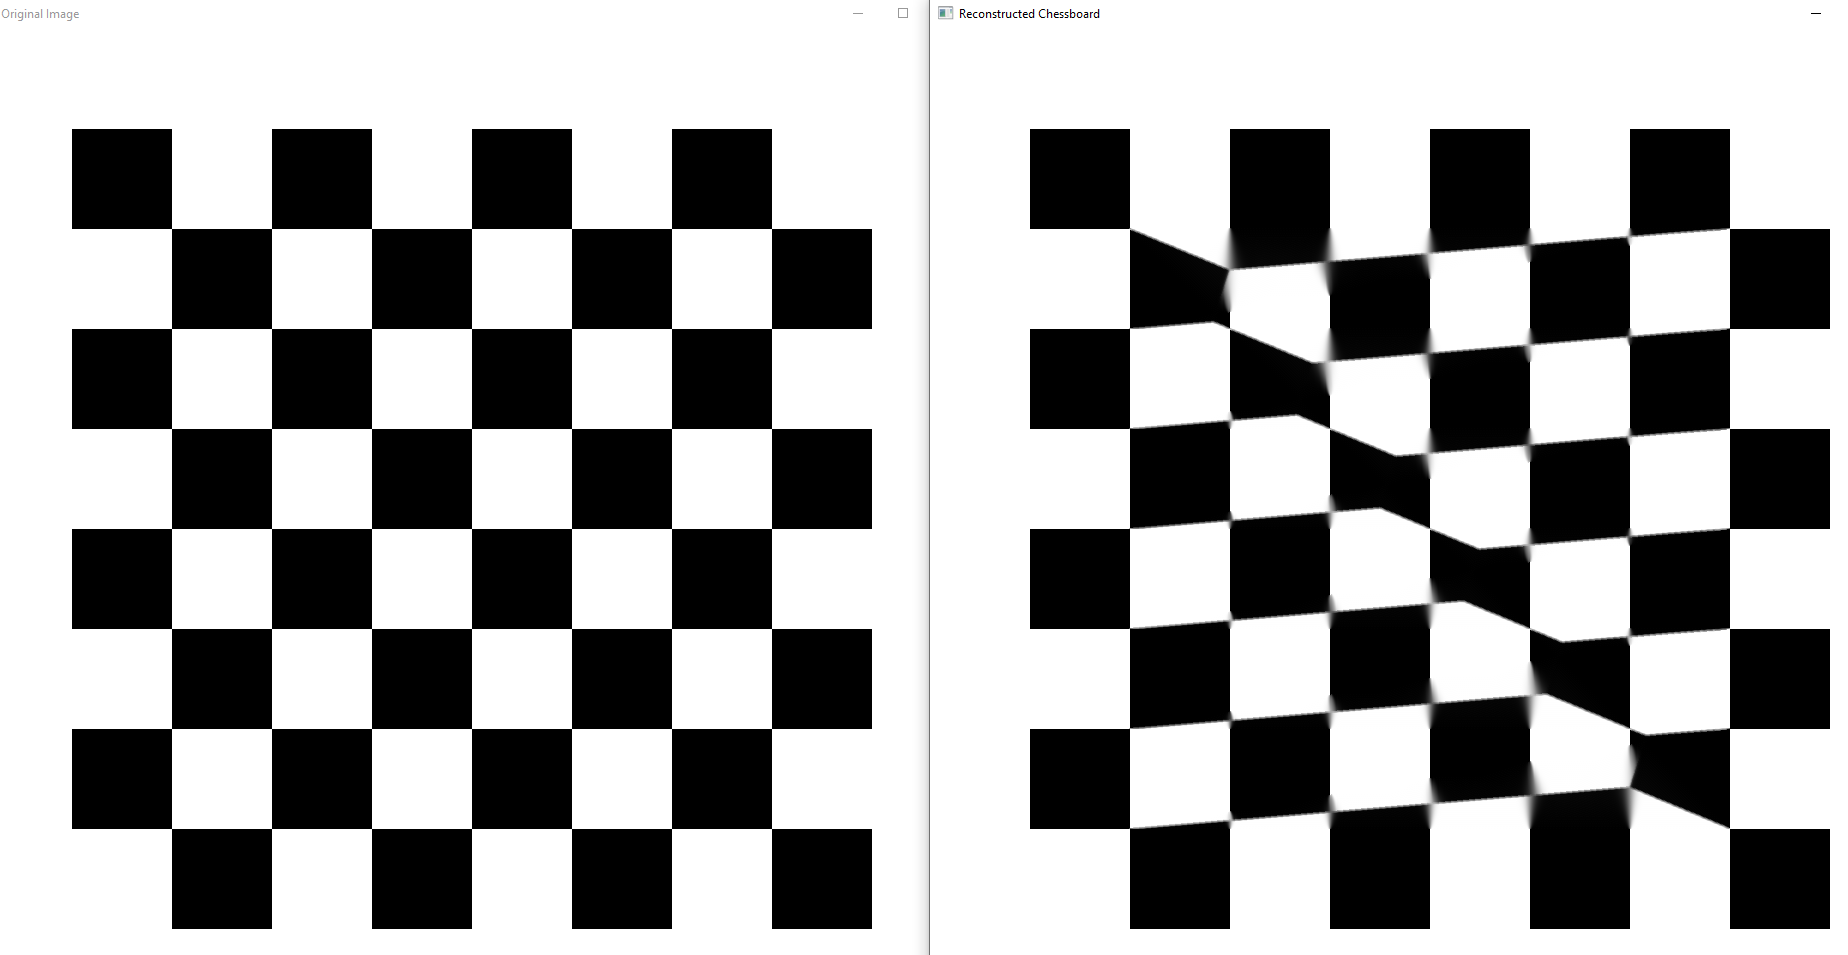

Therefore, we will need an appropriate GAN implementation of our chessboard reconstruction.

# 2. GAN-implementation

🔥 Step 1: Prepare a Chessboard Dataset  

✅ Gather images of chessboards with missing squares → Create a dataset with secluded chessboards (input) and complete chessboards (target output).  
✅ Preprocess images with OpenCV → Resize images, convert them to grayscale, and normalize pixel values between 0-1.

🔥 Step 1.1: Create the Training Dataset Folder  

1️⃣ Inside our project directory, create the folders manually:

🚀 Step 1.2: Collect Training Images  

✅ If we already have images, we move them into the respective folders (secluded and complete).  
✅ If we need chessboard images, we use OpenCV to generate synthetic ones:

In [65]:
import cv2
import numpy as np

def generate_chessboard(image_size=256, missing_squares=2):
    """Generate a synthetic chessboard with missing squares."""
    board = np.zeros((image_size, image_size), dtype=np.uint8)
    square_size = image_size // 8

    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                cv2.rectangle(board, (j * square_size, i * square_size),
                              ((j+1) * square_size, (i+1) * square_size), 255, -1)

    # Remove random squares
    for _ in range(missing_squares):
        x, y = np.random.randint(0, 8, size=2)
        board[y * square_size: (y+1) * square_size, x * square_size: (x+1) * square_size] = 0

    return board

# Generate and save sample training images
for i in range(100):  # Create 100 samples
    cv2.imwrite(f"dataset/secluded/chessboard_{i}.png", generate_chessboard(missing_squares=3))
    cv2.imwrite(f"dataset/complete/chessboard_{i}.png", generate_chessboard(missing_squares=0))

print("Synthetic chessboard dataset created successfully! ✅")


Synthetic chessboard dataset created successfully! ✅


🔥 Step 1.3: Verify Dataset Exists  

Run this Python command to confirm our dataset files exist:

In [67]:
import os
print("Secluded:", os.listdir("dataset/secluded/"))
print("Complete:", os.listdir("dataset/complete/"))

Secluded: ['chessboard_0.png', 'chessboard_1.png', 'chessboard_10.png', 'chessboard_11.png', 'chessboard_12.png', 'chessboard_13.png', 'chessboard_14.png', 'chessboard_15.png', 'chessboard_16.png', 'chessboard_17.png', 'chessboard_18.png', 'chessboard_19.png', 'chessboard_2.png', 'chessboard_20.png', 'chessboard_21.png', 'chessboard_22.png', 'chessboard_23.png', 'chessboard_24.png', 'chessboard_25.png', 'chessboard_26.png', 'chessboard_27.png', 'chessboard_28.png', 'chessboard_29.png', 'chessboard_3.png', 'chessboard_30.png', 'chessboard_31.png', 'chessboard_32.png', 'chessboard_33.png', 'chessboard_34.png', 'chessboard_35.png', 'chessboard_36.png', 'chessboard_37.png', 'chessboard_38.png', 'chessboard_39.png', 'chessboard_4.png', 'chessboard_40.png', 'chessboard_41.png', 'chessboard_42.png', 'chessboard_43.png', 'chessboard_44.png', 'chessboard_45.png', 'chessboard_46.png', 'chessboard_47.png', 'chessboard_48.png', 'chessboard_49.png', 'chessboard_5.png', 'chessboard_50.png', 'chessbo

✔ If the output lists files, our dataset is ready for GAN training!

In [71]:
import cv2
import numpy as np
import os

def preprocess_image(image_path, size=(256, 256)):
    """Preprocess chessboard images: Resize & Normalize."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, size) / 255.0  # Normalize
    return image

# Load dataset
input_images = []  # Secluded boards
target_images = []  # Complete boards

for filename in os.listdir("dataset/secluded/"):
    img = preprocess_image(f"dataset/secluded/{filename}")
    input_images.append(img)

for filename in os.listdir("dataset/complete/"):
    img = preprocess_image(f"dataset/complete/{filename}")
    target_images.append(img)

input_images = np.array(input_images).reshape(-1, 256, 256, 1)
target_images = np.array(target_images).reshape(-1, 256, 256, 1)

✔ This loads our chessboard images, preprocesses them, and prepares them for GAN training.

🚀 Step 2: Build Our GAN Model  

✅ Generator → Creates missing chessboard parts  
✅ Discriminator → Evaluates the authenticity of generated images  
✅ Adversarial Model → Combines both networks for GAN training

In [73]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, LeakyReLU, Flatten, Reshape, UpSampling2D
from tensorflow.keras.models import Model

# Build Generator
def build_generator():
    input_noise = Input(shape=(100,))
    x = Dense(64 * 64 * 128)(input_noise)
    x = Reshape((64, 64, 128))(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, kernel_size=3, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(1, kernel_size=3, padding="same", activation="sigmoid")(x)

    return Model(input_noise, x)

# Build Discriminator
def build_discriminator():
    input_image = Input(shape=(256, 256, 1))
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(input_image)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Flatten()(x)
    x = Dense(1, activation="sigmoid")(x)

    return Model(input_image, x)

# Compile GAN Model
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

discriminator.trainable = False  # Freeze discriminator in GAN training
gan_input = Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = Model(gan_input, gan_output)
gan.compile(optimizer="adam", loss="binary_crossentropy")


C:\Users\balan\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


✔ This creates a basic GAN for chessboard reconstruction.

🔥 Step 3: Train Our GAN  

✅ Use stochastic gradient descent (SGD) to refine the model  
✅ Train discriminator on real & fake images  
✅ Train generator using adversarial loss

import matplotlib.pyplot as plt

epochs = 5000
batch_size = 64

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, input_images.shape[0], batch_size)
    real_images = target_images[idx]
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_images = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
    d_loss = np.add(d_loss_real, d_loss_fake) / 2
    
    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Display Progress
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")

        # Save example generated image
        generated_image = generator.predict(np.random.normal(0, 1, (1, 100))).reshape(256, 256)
        plt.imshow(generated_image, cmap="gray")
        plt.savefig(f"generated_chessboard_{epoch}.png")


✔ The training loop refines the GAN model, making it generate better missing chessboard parts over time.

Alternative: Google Colab GPU training:  

Google Colab provides free access to GPU acceleration, making GAN training significantly faster than a local CPU setup. Here’s how one can run our GAN training function on Google Colab:

🔥 Step 3.1: Open Google Colab  

1️⃣ Go to Google Colab  
2️⃣ Click "New Notebook" to create a fresh environment

🚀 Step 3.2: Enable GPU for Faster Training  

1️⃣ Click "Runtime" → "Change runtime type"  
2️⃣ Select "GPU" from the dropdown  
3️⃣ Click "Save"

✔ This ensures your GAN training runs on GPU, making it much faster.

🔧 Step 3.3: Upload Our Training Script  

1️⃣ Inside Google Colab, go to "Files" (left sidebar)  
2️⃣ Click "Upload" and add:

Our GAN training script (train_gan.py)

Our chessboard dataset (dataset/secluded/ & dataset/complete/)

📜 Step 3.4: Install Required Dependencies  

Google Colab doesn’t have OpenCV & TensorFlow pre-installed, so run:  

!pip install tensorflow keras numpy matplotlib opencv-python  

✔ This installs all necessary Python libraries.


🚀 Step 3.5: Run Our GAN Training  

Load our script and start training:  

!python train_gan.py

OR, if running directly in a Colab cell:  

from train_gan import start_training  # Import our training function
start_training()  # Execute GAN training


🔥 Step 3.6: Optional: Save & Download the Model  

1. Once training is complete, save the trained GAN model:  

"from tensorflow.keras.models import save_model

generator.save("/content/gan_chessboard_model.h5")  # Save model in Colab"  

2. Then download it manually by clicking the file in the Colab sidebar.   

3. Alternative without Colab but via CPU:  

🚀 Save Our Model via CPU
After training, save the generator to use in chessboard reconstruction:  

"generator.save("gan_chessboard_model.h5")  

print("Chessboard GAN Model Saved! ✅")"


✔ This saves our trained model, allowing it to be used later for missing chessboard reconstruction.

🔥 Final Thoughts  

✅ This GAN training pipeline will generate missing chessboard parts.  
✅ After saving the model, it can be used in your reconstruct_chessboard() function!  
✅ Fine-tuning is required—adjust layers, epochs, and dataset size for best results.

__RECONSTRUCTING IMAGES__

Step 4: Approach to Reconstructing a Chessboard with GAN & OpenCV  

1️⃣ Preprocess the Image → Convert the secluded chessboard into grayscale & detect edges.  
2️⃣ Identify Missing Sections → Using OpenCV contour detection, recognize which squares are absent.  
3️⃣ Train a GAN Model → If you have a dataset of chessboard images, train a GAN to learn the pattern and generate missing squares.  
4️⃣ Use OpenCV to Frame the Image → Resize and add a border around the reconstructed chessboard.  
5️⃣ Merge GAN Output with Original Image → Blend generated parts with the secluded chessboard.

🔧 Python Function Implementation  

Here's a starting point for our function. It detects missing squares, resizes, and frames the chessboard. The GAN integration would require a trained model.

In [26]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def reconstruct_chessboard(image_path, new_size=(8, 8), model_path="gan_chessboard_model.h5"):
    """Recreates missing chessboard parts using GAN and adds an appropriate frame."""

    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    original_size = image.shape[:2]

    # Detect edges (helps in identifying missing sections)
    edges = cv2.Canny(image, 30, 120)  # Lower threshold to detect more edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    print(f"Contours found: {len(contours)}")  # ✅ Debugging

    missing_squares = []  # ✅ Ensure the list exists before filling it

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        print(f"Contour at {x},{y} with size {w}x{h}")  # ✅ Check detected regions
        
        if w > original_size[0] // 8 and h > original_size[1] // 8:  
            missing_squares.append((x, y, w, h))

    print(f"Detected {len(missing_squares)} missing squares.")

    # Load GAN Model for missing square generation
    try:
        gan_model = load_model(model_path, compile=False)  # Prevent training config warning
    except Exception as e:
        print(f"Could not load GAN model: {e}")
        return image  # Return original if no GAN available

    gan_model.compile(optimizer="adam", loss="binary_crossentropy")  # Manually compile if needed

    # Generate missing squares using GAN
    for (x, y, w, h) in missing_squares:
        noise = np.random.normal(0, 1, (1, 100))  # Example random noise for GAN input
        generated_square = gan_model.predict(noise)

        print(f"Generated square shape: {generated_square.shape}")  # Debugging output

        # Adjust generated square size using OpenCV resizing
        generated_square_resized = cv2.resize(generated_square.reshape(generated_square.shape[1:]), (w, h))

        image[y:y+h, x:x+w] = generated_square_resized * 255  

    # Debug visualization: Highlight missing squares
    for (x, y, w, h) in missing_squares:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow("Reconstructed Chessboard", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Resize and add a frame
    resized_image = cv2.resize(image, (800, 800))  # Adjusted size for display
    bordered_image = cv2.copyMakeBorder(resized_image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(255, 255, 255))

    cv2.imwrite("reconstructed_chessboard.png", bordered_image)
    return bordered_image

In [28]:
chessboard_image = reconstruct_chessboard("pos50_seccluded.png", new_size=(8, 8))
cv2.imwrite("reconstructed_chessboard.png", chessboard_image)  # Save the output

Contours found: 1
Contour at 289,314 with size 444x385
Detected 1 missing squares.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
Generated square shape: (1, 256, 256, 1)


True

# 3. Results

GAN trainings have been performed via Google Colabs free access to a T4 GPU for  
1. 5000 epochs, batch size of 64 and 200 chessboard images (duration 2h)
2. 10000 epochs, batch size of 32 and 200 chessboard images (duration 5 - 6 hours)

Secluded (8x7) portion of the chessboard:

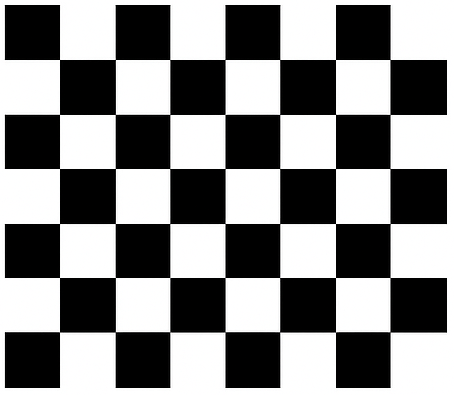

After 10000 epochs for batch sizes 32 the GAN model was capable of draving an (8x8) rectangular boundary around the originally secluded (8x7) portion of the chessboard and reconstructing its rectangles (the last 8th row is the missing corrected chessboard portion):

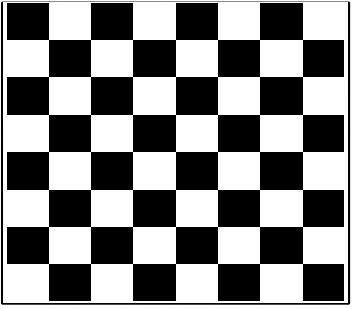

# 4. Recommendations for further improvements

Since our GAN now successfully reconstructs frontal chessboard images, the next challenge is handling tilted, distorted, and partially obscured boards. Here are some improvements and techniques to make your GAN more robust:

🔧 Key Improvements for Tilted Chessboards  

1️⃣ Perspective Transformation (Homography)

Before feeding tilted images into the GAN, normalize the perspective using OpenCV's homography matrix.

Example (Python code):  

""matrix = cv2.getPerspectiveTransform(src_points, dst_points)  

corrected_image = cv2.warpPerspective(image, matrix, (width, height))""

This flattens angled boards, making GAN training more consistent.

2️⃣ Data Augmentation for Robustness

Introduce rotations, perspective warping, and occlusions to your dataset before training.

Example augmentation techniques (Python code):  

"from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20, shear_range=0.2, zoom_range=0.2)  

augmented_images = datagen.flow(input_images, batch_size=32)
"

3️⃣ Enhanced Feature Detection Using Deep Learning

Instead of relying solely on OpenCV contour detection, use a CNN-based object detector (e.g., YOLO or Faster R-CNN) trained on chessboard patterns.

This ensures better recognition of obscured squares when detecting missing sections.

4️⃣ Adaptive GAN Input Resolution

Adjust the GAN-generated square size dynamically based on detected board distortion.

Example (Python code):  

""resized_square = cv2.resize(generated_square, (w_corrected, h_corrected))""


5️⃣ Refine GAN Loss Function

Introduce a perceptual loss using a pretrained CNN (e.g., VGG16) to make generated chessboard regions more realistic.

Modify loss function (Python code):  

"from tensorflow.keras.applications import VGG16
feature_extractor = VGG16(weights='imagenet', include_top=False)
"

🔥 Next Steps  

✔ Implement perspective correction (homography) to handle tilted boards.  
✔ Augment dataset with rotated, distorted chessboards for better GAN generalization.  
✔ Test CNN-based detection instead of just contours for obscured pieces.  

In summary:  

### **🚀 Next Steps**
1️⃣ **Further Train Our GAN** → Improve robustness for **tilted chessboard views**.  
2️⃣ **Refine Loss Functions** → Introduce **perceptual loss** (VGG-based) for **better image quality**.  
3️⃣ **Dataset Expansion** → Add diverse **partially obscured chessboards** to strengthen model learning.  